# Predicting Health Insurance

## Business Understanding
### Background:

In the US, health insurance is important for the financial security of the population. Due to that, companies are trying to improve the enrollment rates among them. Predicting whether a customer is likely to take up insurance can help optimize resource allocation and improve customer engagement strategies.

### Business Objectives:

Build a model to predict which of your customers don’t have health insurance

### Business Success Criteria:

Succefully predict the customers that don't have health insurance according to the provided data.

### Inventory of Resources:

Data: A dataset with demographic and behavioral attributes such as employment status, income, housing type, marital status, and more.

Tools: Python Libraries, Jupiter Notebook.

### Requirements, Assumptions, and Constraints:

Requirements: ???

Assumptions: Data accurately reflects the characteristics of customers.

Constraints: Data imbalance in certain attributes.

### Risks and Contingencies:

Risk: Missing values or noisy data could reduce model accuracy.
Contingency: Data cleaning and preprocessing steps.

### Costs and Benefits:

Costs: Initial setup, data preprocessing and operationalizing the model.
Benefits: Improved conversion rates and data-driven decision-making.

### Data Mining Goals:
Develop a predictive model to classify customers based on their likelihood to purchase health insurance.
Identify the most influential factors that drive insurance uptake.

### Data Mining Success Criteria:

Model accuracy above 80%. 
Identify the top 5 features that influence insurance uptake.

## Data Understanding

### Initial Data Collection and Description:

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.chdir("/Users/User/OneDrive/Documentos/ICD/PROJ")
df = pd.read_csv('customer.csv')

df.head()


,Unnamed: 0,custid,sex,is_employed,income,marital_status,health_ins,housing_type,num_vehicles,age,state_of_res,code_column,gas_usage,rooms,recent_move_b
0,7,000006646_03,Male,True,22000.0,Never married,True,Homeowner free and clear,0.0,24,Alabama,1047,210.0,3,F
1,8,000007827_01,Female,NaN,23200.0,Divorced/Separated,True,Rented,0.0,82,Alabama,1047,3.0,6,T
2,9,000008359_04,Female,True,21000.0,Never married,True,Homeowner with mortgage/loan,2.0,31,Alabama,1047,40.0,3,F
3,10,000008529_01,Female,NaN,37770.0,Widowed,True,Homeowner free and clear,1.0,93,Alabama,1047,120.0,2,F
4,11,000008744_02,Male,True,39000.0,Divorced/Separated,True,Rented,2.0,67,Alabama,1047,3.0,2,F


In [30]:
df.shape

(72458, 15)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72458 entries, 0 to 72457
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      72458 non-null  int64  
 1   custid          72458 non-null  object 
 2   sex             72458 non-null  object 
 3   is_employed     46943 non-null  object 
 4   income          72458 non-null  float64
 5   marital_status  72458 non-null  object 
 6   health_ins      72458 non-null  bool   
 7   housing_type    70772 non-null  object 
 8   num_vehicles    70772 non-null  float64
 9   age             72458 non-null  int64  
 10  state_of_res    72458 non-null  object 
 11  code_column     72458 non-null  int64  
 12  gas_usage       70772 non-null  float64
 13  rooms           72458 non-null  int64  
 14  recent_move_b   70771 non-null  object 
dtypes: bool(1), float64(3), int64(4), object(7)
memory usage: 7.8+ MB


### Data Exploration:

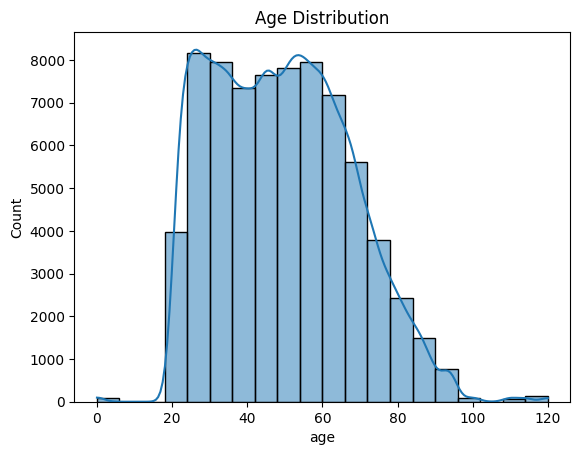

In [32]:
sns.histplot(df['age'], kde=True, bins=20)
plt.title('Age Distribution')   
plt.show()


Most of the customers are young or early 40s, between 18 and 45 years old.

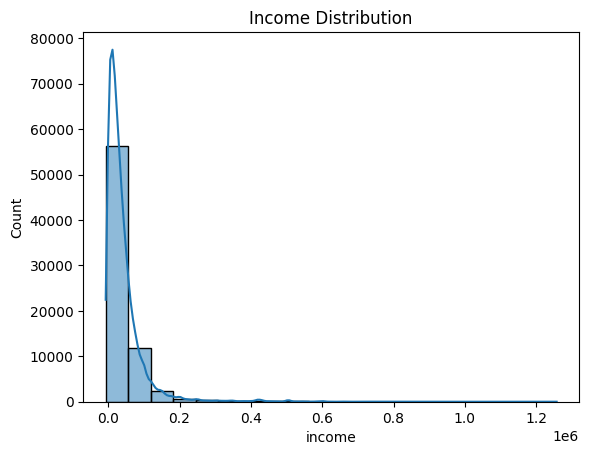

In [33]:
sns.histplot(df['income'], kde=True, bins=20)
plt.title('Income Distribution')
plt.show()

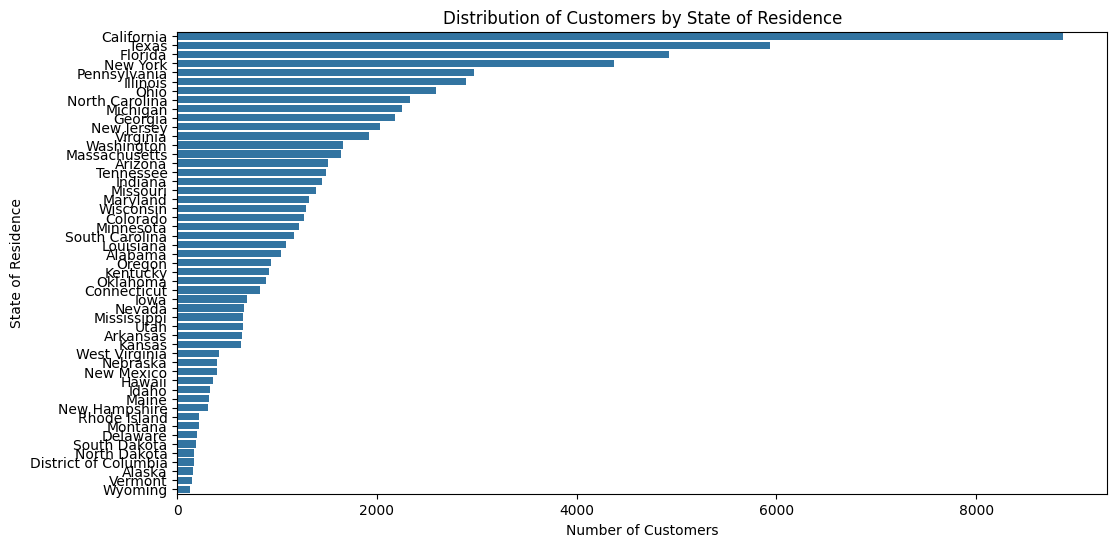

In [34]:
plt.figure(figsize=(12, 6))
sns.countplot(y='state_of_res', data=df, order=df['state_of_res'].value_counts().index)
plt.title('Distribution of Customers by State of Residence')
plt.xlabel('Number of Customers')
plt.ylabel('State of Residence')
plt.show()

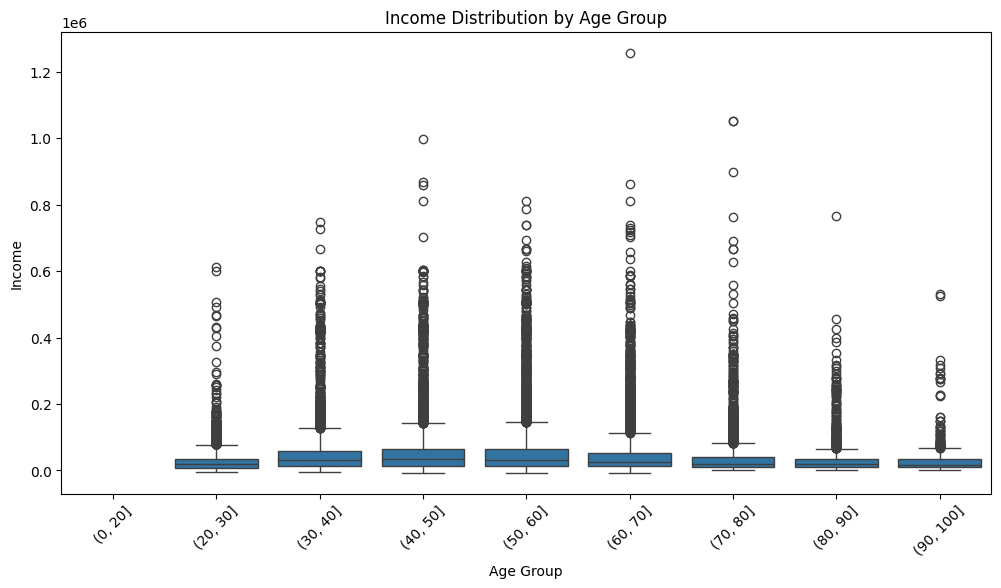

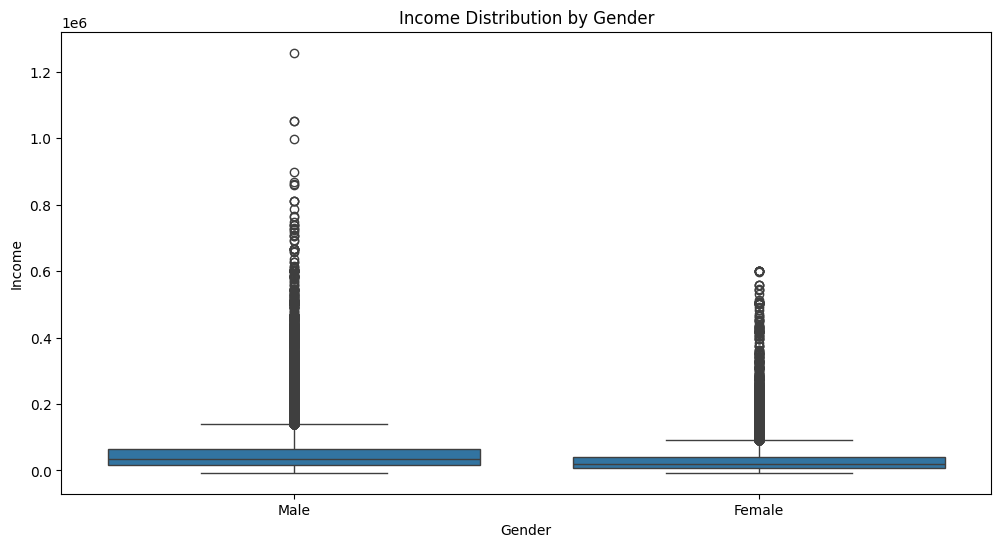

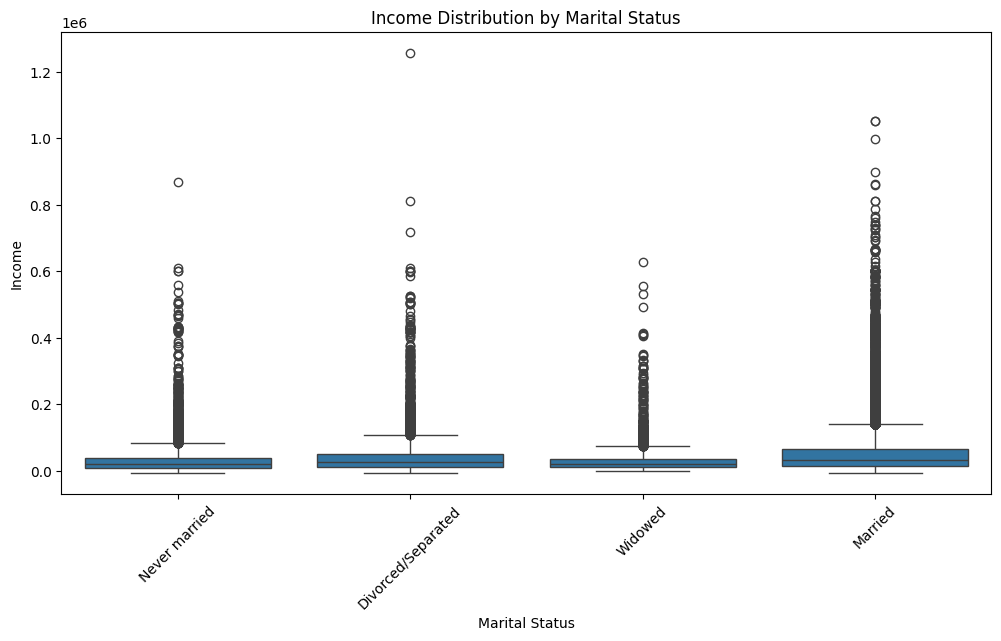

In [42]:
# Boxplot for income by age group
plt.figure(figsize=(12, 6))
sns.boxplot(x=pd.cut(df['age'], bins=[0, 20, 30, 40, 50, 60, 70, 80, 90, 100]), y='income', data=df)
plt.title('Income Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Income')
plt.xticks(rotation=45)
plt.show()

# Boxplot for income by gender
plt.figure(figsize=(12, 6))
sns.boxplot(x='sex', y='income', data=df)
plt.title('Income Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Income')
plt.show()

# Boxplot for income by marital status
plt.figure(figsize=(12, 6))
sns.boxplot(x='marital_status', y='income', data=df)
plt.title('Income Distribution by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Income')
plt.xticks(rotation=45)
plt.show()



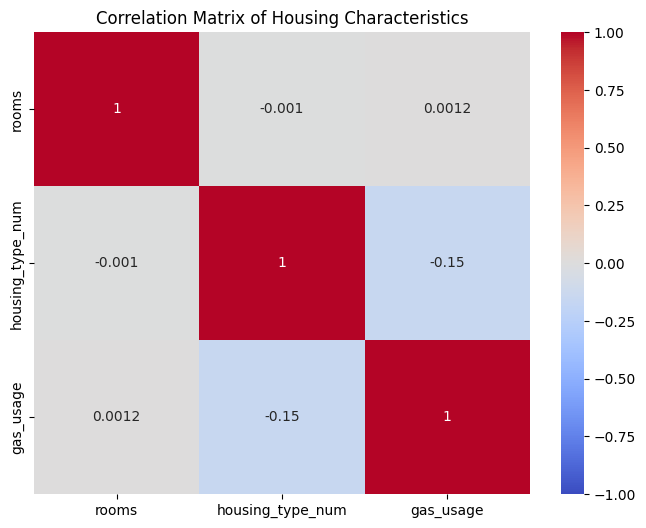

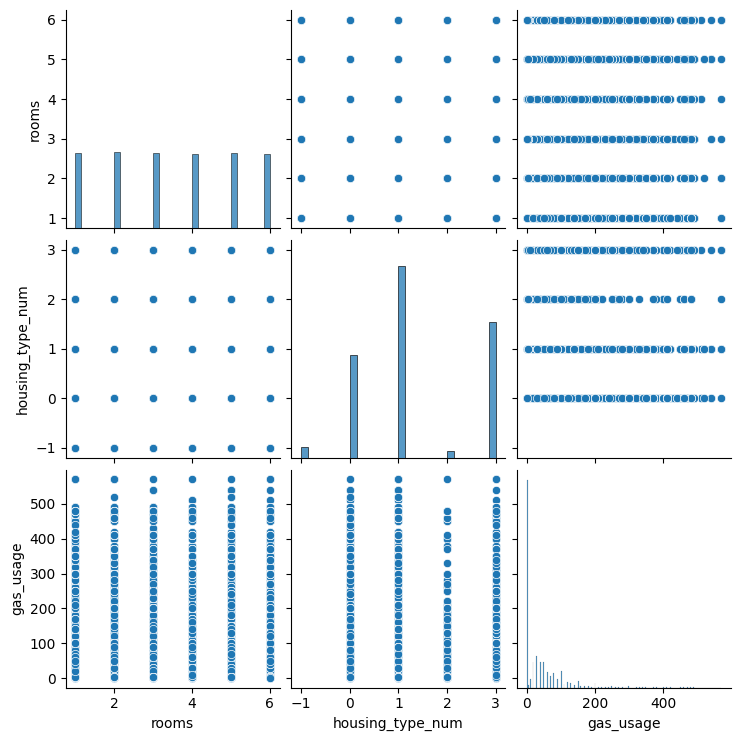

In [ ]:
df['housing_type_num'] = df['housing_type'].astype('category').cat.codes

correlation_matrix = df[['rooms', 'housing_type_num', 'gas_usage']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Housing Characteristics')
plt.show()

sns.pairplot(df[['rooms', 'housing_type_num', 'gas_usage']])
plt.show()

In [35]:
df.isnull().sum()

Unnamed: 0            0
custid                0
sex                   0
is_employed       25515
income                0
marital_status        0
health_ins            0
housing_type       1686
num_vehicles       1686
age                   0
state_of_res          0
code_column           0
gas_usage          1686
rooms                 0
recent_move_b      1687
dtype: int64

## Data Preparation

In [36]:
df.is_employed.value_counts(dropna=False)

is_employed
True     44630
NaN      25515
False     2313
Name: count, dtype: int64

In [37]:
df.rename({'Unnamed: 0':'idx'}, axis=1, inplace=True)
df.set_index("idx", inplace = True)
df.head()



,custid,sex,is_employed,income,marital_status,health_ins,housing_type,num_vehicles,age,state_of_res,code_column,gas_usage,rooms,recent_move_b
idx,,,,,,,,,,,,,,
7,000006646_03,Male,True,22000.0,Never married,True,Homeowner free and clear,0.0,24,Alabama,1047,210.0,3,F
8,000007827_01,Female,NaN,23200.0,Divorced/Separated,True,Rented,0.0,82,Alabama,1047,3.0,6,T
9,000008359_04,Female,True,21000.0,Never married,True,Homeowner with mortgage/loan,2.0,31,Alabama,1047,40.0,3,F
10,000008529_01,Female,NaN,37770.0,Widowed,True,Homeowner free and clear,1.0,93,Alabama,1047,120.0,2,F
11,000008744_02,Male,True,39000.0,Divorced/Separated,True,Rented,2.0,67,Alabama,1047,3.0,2,F


In [38]:
df['is_employed'] = df['is_employed'].fillna('Not in Workforce')
df.head()

,custid,sex,is_employed,income,marital_status,health_ins,housing_type,num_vehicles,age,state_of_res,code_column,gas_usage,rooms,recent_move_b
idx,,,,,,,,,,,,,,
7,000006646_03,Male,True,22000.0,Never married,True,Homeowner free and clear,0.0,24,Alabama,1047,210.0,3,F
8,000007827_01,Female,Not in Workforce,23200.0,Divorced/Separated,True,Rented,0.0,82,Alabama,1047,3.0,6,T
9,000008359_04,Female,True,21000.0,Never married,True,Homeowner with mortgage/loan,2.0,31,Alabama,1047,40.0,3,F
10,000008529_01,Female,Not in Workforce,37770.0,Widowed,True,Homeowner free and clear,1.0,93,Alabama,1047,120.0,2,F
11,000008744_02,Male,True,39000.0,Divorced/Separated,True,Rented,2.0,67,Alabama,1047,3.0,2,F


In [39]:
df.drop(columns=['custid'],inplace=True)
df.head()

,sex,is_employed,income,marital_status,health_ins,housing_type,num_vehicles,age,state_of_res,code_column,gas_usage,rooms,recent_move_b
idx,,,,,,,,,,,,,
7,Male,True,22000.0,Never married,True,Homeowner free and clear,0.0,24,Alabama,1047,210.0,3,F
8,Female,Not in Workforce,23200.0,Divorced/Separated,True,Rented,0.0,82,Alabama,1047,3.0,6,T
9,Female,True,21000.0,Never married,True,Homeowner with mortgage/loan,2.0,31,Alabama,1047,40.0,3,F
10,Female,Not in Workforce,37770.0,Widowed,True,Homeowner free and clear,1.0,93,Alabama,1047,120.0,2,F
11,Male,True,39000.0,Divorced/Separated,True,Rented,2.0,67,Alabama,1047,3.0,2,F


In [40]:
df

,sex,is_employed,income,marital_status,health_ins,housing_type,num_vehicles,age,state_of_res,code_column,gas_usage,rooms,recent_move_b
idx,,,,,,,,,,,,,
7,Male,True,22000.0,Never married,True,Homeowner free and clear,0.0,24,Alabama,1047,210.0,3,F
8,Female,Not in Workforce,23200.0,Divorced/Separated,True,Rented,0.0,82,Alabama,1047,3.0,6,T
9,Female,True,21000.0,Never married,True,Homeowner with mortgage/loan,2.0,31,Alabama,1047,40.0,3,F
10,Female,Not in Workforce,37770.0,Widowed,True,Homeowner free and clear,1.0,93,Alabama,1047,120.0,2,F
11,Male,True,39000.0,Divorced/Separated,True,Rented,2.0,67,Alabama,1047,3.0,2,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99996,Female,True,18500.0,Never married,False,Rented,1.0,25,Wyoming,131,10.0,4,F
99997,Female,Not in Workforce,20800.0,Widowed,True,Homeowner free and clear,1.0,86,Wyoming,131,120.0,6,F
99998,Male,True,75000.0,Married,True,Homeowner with mortgage/loan,2.0,50,Wyoming,131,90.0,3,F


### Authors: 

- José Santos up202108729
- Luís Du up202105385
- Athos Freitas up202108792